# Convert cartesian to polar detector

With this tool **CartToPolarDetector**, you can precisely convert a cartesian detector to a polar detector. It does not rely on any approximation methods like the method of nearest-neighbor or interpolation. This tool simply overlays a cartesian detector with a polar detector grid and computes the polar pixel values depending on its areas of intersection with the cartesian pixels and their corresponding values. 

The assumption that goes into this conversion is the following: The underlying value density of a pixel is *homogeneous*, meaning, let $v$ and $A$ be the assigned value and area of a pixel, respectively, and let $a$ be a subarea of $A$, then the corresponding value of $a$, i.e., $v_a$, is given by 

$$v_a = a  \frac{v}{A}.$$




This notebook explains how to use the **CartToPolarDetector** by providing different examples with illustrations. It shows how to convert a cartesian grid to a polar one and how to generate radial and azimuthal profiles. 

## Import the package

The following cells import different packages, including the **CartToPolarDetector** package. If you have not installed the package please do so by following the instructions in README.md. Even if not installed, you can still use this notebook if you have downloaded the whole project from github by setting `is_installed = False`. The following cell additionally defines a function we need to load some example data.

Please run the following cell.

**Note:** The only function you need for converting the grid is *convert*, which is imported from the package alongside the function *read_input*, which will become relevant lateron.

In [2]:
is_installed = False

import numpy as np
import matplotlib.pyplot as plt
import os
import sys

%matplotlib inline
%pylab inline

if is_installed:
    path_here = os.path.dirname(os.path.realpath("__file__"))
    sys.path.append(path_here + '/../src/')

from CartToPolarDetector import  convert, read_input


# Function to load the test data
def laod_data(path_to_cart_detector):
	""" Load test data for cenversion test. 
        The image of the test data (e.g., using plt.imshow)
        shows a wavy pattern containing positive and negative 
        pixel values. """
	
	cart_detector = np.load(path_to_cart_detector)
	cart_detector = cart_detector["example_cart_detector"]
	
	return cart_detector

Populating the interactive namespace from numpy and matplotlib


## Definitions

The package requires you to specifiy some path that is associated with the detector you want to convert. In this example the cartesian detector has pixel values given in Jy and it is stored in *example/input/cartesian_detector.npz*. Additionally, we have to provide the pixel width for the cartesian detector pixels. Here, a pixel has a width of 0.1 au. 

**Note**: The path variable will later be an input variable of the conversion function, however, it will only be used for bookkeeping purposes. In principle, it is possible to provide the function with any string, however, I highly suggest using a meaningful string.  

Next, we set the path variable, load our data (flux in Jy per pixel) using in a numpy array, and set the width of a pixel. Afterwards, the number of detector pixels is determined. Please run the following cell. 

In [3]:
# Path to the cartesian detector
path_to_cart_detector = "./input/cartesian_detector.npz"

# 2D cartesian detector as array; unit: Jy
cart_detector = laod_data(path_to_cart_detector)

# Pixel width; unit: au
px_w = 0.1

# Cartesian detector pixel numbers
(N_x,N_y) = cart_detector.shape

### Visualizing input cartesian detector

First, we calculate the flux density in Jy/au$^2$ from the flux map given in Jy/pixel. 
Subsequently, both the flux and the flux density are visualized. The flux density is particularly interesting, as the method with which the cartesian detector is converted into a polar detector assumes a homogeneous pixel value density and, thus, it should stay constant during the conversion. 

Please run the following cell to visualize the input data.

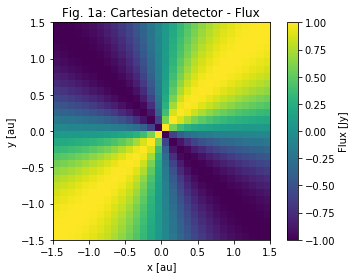

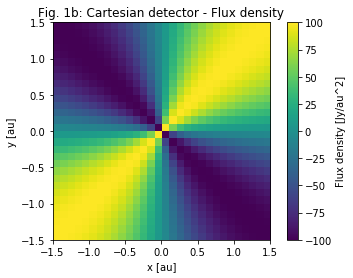

In [5]:
# Calculate the flux density; unit: Jy/au^2
cart_detector_density = cart_detector/px_w/px_w

# Plot input data
fig = plt.figure("Cartesian Flux")
VMIN = min(0,1.5*cart_detector.min())
VMAX = max(0,1.5*cart_detector.max())

plt.imshow(cart_detector.T, origin="lower",
           extent=(-N_x/2.*px_w,N_x/2.*px_w,-N_x/2.*px_w,N_x/2.*px_w))
plt.xlabel("x [au]")
plt.ylabel("y [au]")
plt.colorbar(label="Flux [Jy]")
plt.title("Fig. 1a: Cartesian detector - Flux")

fig = plt.figure("Cartesian Flux Density")
VMIN_density = min(0,1.5*cart_detector_density.min())
VMAX_density = max(0,1.5*cart_detector_density.max())

plt.imshow(cart_detector_density.T, origin="lower",
           extent=(-N_x/2.*px_w,N_x/2.*px_w,-N_x/2.*px_w,N_x/2.*px_w))
plt.xlabel("x [au]")
plt.ylabel("y [au]")
plt.colorbar(label="Flux density [Jy/au^2]")
plt.title("Fig. 1b: Cartesian detector - Flux density");

Since all pixels have the same area, the flux and flux density are the same except for some constant factor.

## Convert to polar detector - Example 1
### Conversion

In the first example we converted the whole cartesian detector to a polar detector. 
The polar detector will be larger than the cartesian detector and fully include it. 
We only specify the number of polar detector cells in $\phi$- and $r$-direction (which will be 96 in both directions in this example), the path where the polar detector will be stored, and a name for this conversion project. Additionally, we disable displaying the progress of this calculation (however, feel free to enable it). The whole calculation of the polar detector is performed by the function *convert*, which stores the results in a folder but also returns the 2D polar detector array.

Please run the following cell.

**Note:** When running the following cell multiple times while `overwrite_results=False`, you will get a warning that indicates that the save_name was already used and the polar detector is stored using a slightly different name. In particular, in this case the chosen name is extended with a string $(i)$ where $i$ is an integer that increases every time the same project save_name variable is used. By default, it is set to `overwrite_results=False`. 

In [6]:
# Nummber of cells in phi- and r-direction of polar detector
N_phi, N_r = 96, 96

# Here the polar detector will be stored
results_folder_path = "./results/"

# Project name: directory with this name will be created storing results
save_name = "wave_example1"

# If desired, one can see the progress of the calculation since it 
# can take some time depending on the detector size.
progress_bar = False

# If overwrite_results = True, the calculated polar detector will 
#     overwrite any former results for the same project.
# If overwrite_results = False, the former results will be kept and the  
#     project name changed to not loose any calculated results. 
overwrite_results = True

# Conversion and sorting of resutls is performed with a single command:
polar_detector_1 = convert(path_to_cart_detector, cart_detector, N_phi, N_r,
                           results_folder_path=results_folder_path,
                           save_name=save_name,
                           progress_bar=progress_bar,
                           overwrite_results=overwrite_results)

Running the *convert* function automatically creates a folder in the *results_folder_path* \
 containing the following files: 


```
wave_example1/
    input.dat                # contains input parameters for conversion
    output.npz               # contains the polar detector grid (2D: phi,r)
    phi_border_values.dat    # contains the N_phi+1 pixel borders for phi
    r_border_values.dat      # contains the N_r+1 pixel borders for r
```

I recommend opening all .dat files once to briefly check our their content.

### Vizualizing the polar detector - Example 1

For visualizing the detector we need to read the generated *./results/wave_example1/input.dat* file. Its content can easily be accessed by using the *read_input* function of the tool, which generates a dictionary containing the information stored in the input file. This function has already previously been imported. We use the resulting dictionary to access the polar pixel width in $\phi$- and $r$-direction.

Additionally, we load the polar pixel grid in terms of its grid cell borders in $\phi$- and $r$-direction. In order to do that, we have to use the path to the corresponding files. 

Now please run the following cell.

In [7]:
# This is the directory in which the polar detector is stored
path_to_results = results_folder_path + save_name

# Load input.dat -> dictionary
polar_detector_params = read_input(path_to_results + "/input.dat")

# Loads phi borders
used_phi = np.loadtxt(path_to_results + "/phi_border_values.dat")

# Loads r borders in units of pixels 
# -> multiply with pixel width to get unit au
used_rad = px_w * np.loadtxt(path_to_results + "/r_border_values.dat")

# Access the pixel width in phi direction
dphi = polar_detector_params["dphi"]

# Access the pixel width in r direction
# -> multiply with pixel width to get unit au
dr = px_w * polar_detector_params["dr"]

### Flux - Example 1

Next we plot the polar detector flux in Jy (per pixel). 

Please run the following cell.

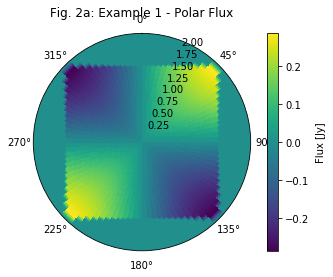

In [9]:
fig = plt.figure("Example 1 - Polar Flux")

phi,rad = np.meshgrid(used_phi, used_rad)
X, Y = phi, rad
ax = fig.add_subplot(111,polar=True)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
img = ax.pcolormesh(X, Y, polar_detector_1.T)
plt.text(1.3,0.5,"Flux [Jy]",rotation=90,
         transform=ax.transAxes,verticalalignment='center')
plt.title("Fig. 2a: Example 1 - Polar Flux")
plt.colorbar(img);

As you can see, the pixel values differ from those of the input cartesian detector in Fig. 1a. The polar detector in this example uses much smaller pixels which, therefore, each represent smaller flux values. However, the density plot will look similar to the input data. This will be shown next.

### Flux density - Example 1

To get the flux density (Jy/au$^2$) each pixel value is divided by the pixel area. 

Please run the following cell to do that.

In [10]:
polar_detector_1_density = np.copy(polar_detector_1)

# Rescaling pixel values: value/area
for i in range(polar_detector_1.shape[0]):
	for j in range(polar_detector_1.shape[1]):
		polar_detector_1_density[i,j] *= 1./(0.5*dphi*(2*j+1)*dr**2)

Please run the following cell to plot the flux density of the polar detector.

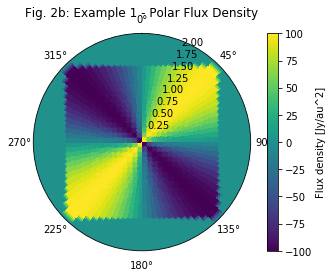

In [11]:
fig = plt.figure("Example 1 - Polar Flux Density")

phi,rad = np.meshgrid(used_phi, used_rad)
X, Y = phi, rad
ax = fig.add_subplot(111,polar=True)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
img = ax.pcolormesh(X, Y, polar_detector_1_density.T)
plt.text(1.3,0.5,"Flux density [Jy/au^2]",rotation=90,
         transform=ax.transAxes,verticalalignment='center')

plt.title("Fig. 2b: Example 1 - Polar Flux Density")
plt.colorbar(img);

As you can see, the flux density of the cartesian (Fig. 1b) and the polar (Fig. 2b) detector indeed stay the same, except for their different detector geometry.

**Note:** Outside the cartesian detector, the value is assumed to be zero. Since the polar detector is larger than the cartesian detector in this example, we can see polar detector pixels with a value of zero outside the range of the cartesian detector. 

## Convert to polar detector - Example 2

In this second example we repeat what we have done in the first example but this time we make the polar detector smaller and locate it in a different region of the cartesian detector. In particular, we shift the polar detector by 3 pixels horizontally and vertically and set the radius of the polar detector to 21 cartesian pixel widths. Then we repeat the steps from example 1.

Please run the following cell.

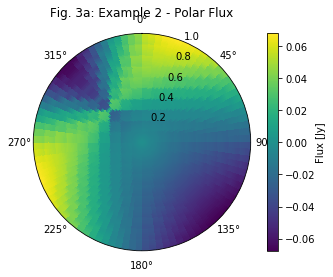

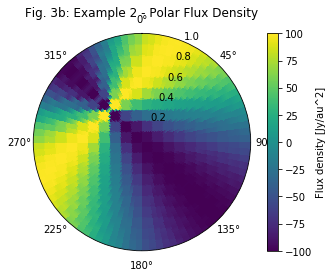

In [12]:
# Set input parameters
N_phi, N_r = 96, 96
R_px_max = 10.
results_folder_path = "./results/"
save_name = "wave_example2"
progress_bar = False
overwrite_results = True

# Shift the center of the polar detector in terms of 
# cartesian input pixel widths
center_shift = [3,-3]

# Calculate polar detector
polar_detector_2 = convert(path_to_cart_detector,cart_detector,N_phi,N_r,
                           center_shift=center_shift,
                           R_px_max_in=R_px_max,
                           results_folder_path=results_folder_path,
                           save_name=save_name,
                           progress_bar=progress_bar,
                           overwrite_results=overwrite_results)

# Read out grid properties
# This is the direcory in which the polar detector is stored
path_to_results = results_folder_path + save_name

polar_detector_params = read_input(path_to_results + "/input.dat")
used_phi = np.loadtxt(path_to_results + "/phi_border_values.dat")
used_rad = px_w * np.loadtxt(path_to_results + "/r_border_values.dat")
dphi	= polar_detector_params["dphi"]
dr 		= px_w * polar_detector_params["dr"]

# Calculate flux density
polar_detector_2_density = np.copy(polar_detector_2)

for i in range(polar_detector_2.shape[0]):
	for j in range(polar_detector_2.shape[1]):
		polar_detector_2_density[i,j] *= 1./(0.5*dphi*(2*j+1)*dr**2)
        
# Plot the flux
fig = plt.figure("Example 2 - Polar Flux")

phi,rad = np.meshgrid(used_phi, used_rad)
X, Y = phi, rad
ax = fig.add_subplot(111,polar=True)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
img = ax.pcolormesh(X, Y, polar_detector_2.T)
plt.text(1.3,0.5,"Flux [Jy]",rotation=90,
         transform=ax.transAxes,verticalalignment='center')

plt.title("Fig. 3a: Example 2 - Polar Flux")
plt.colorbar(img)

# Plot the flux density
fig = plt.figure("Example 2 - Polar Flux Density")

phi,rad = np.meshgrid(used_phi, used_rad)
X, Y = phi, rad
ax = fig.add_subplot(111,polar=True)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
img = ax.pcolormesh(X, Y, polar_detector_2_density.T,cmap=None)
plt.text(1.3,0.5,"Flux density [Jy/au^2]",rotation=90,
         transform=ax.transAxes,verticalalignment='center')

plt.title("Fig. 3b: Example 2 - Polar Flux Density")
plt.colorbar(img);

## Reading polar detector and radial and azimuthal profiles

Next, we will read out an exemplary polar detector and calculate its radial profile as well as its azimuthal profile. 
To do that, we provide a path that specifies the location of the polar detector. Then we read out the detector and extract some key parameters that were used to generate it using the *read_input* function. 

In this example we assume again, that the detector has pixel values using the unit Jy and the pixel width is given in au.

Please run the following cell.

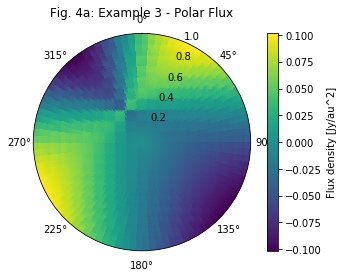

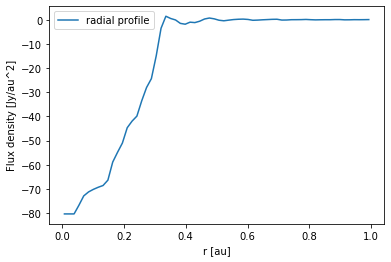

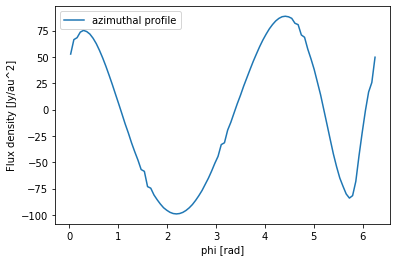

In [13]:
# Set path to results from converted grid
results_folder_path = "./results/"
save_name = "wave_example3"
path_to_results = results_folder_path + save_name

# Pixel width of cartesian detector in au
px_w = 0.1

# Read detector file (here in Jy)
polar_detector_3 = np.load(path_to_results + '/output.npz')['polar']

# Get some input parameters used for this detector
polar_detector_params = read_input(path_to_results + "/input.dat")
used_phi = np.loadtxt(path_to_results + "/phi_border_values.dat")
used_rad = px_w * np.loadtxt(path_to_results + "/r_border_values.dat")
dphi	= polar_detector_params["dphi"]
dr 		= px_w * polar_detector_params["dr"]
N_phi = polar_detector_params["N_phi"]
N_r = polar_detector_params["N_r"]

# Radius of detector in au (due to factor px_w)
R_max = px_w * polar_detector_params["R_px_max"]                        

# Plot the flux
fig = plt.figure("Example 3 - Polar Flux")

phi,rad = np.meshgrid(used_phi, used_rad)
X, Y = phi, rad
ax = fig.add_subplot(111,polar=True)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
img = ax.pcolormesh(X, Y, polar_detector_3.T)
plt.text(1.35,0.5,"Flux density [Jy/au^2]",rotation=90,
         transform=ax.transAxes,verticalalignment='center')

plt.title("Fig. 4a: Example 3 - Polar Flux")
plt.colorbar(img)


# Calculate radial and azimuthal profile


# Sum over phi-axis
radial_profile = np.sum(polar_detector_3,axis=0)     

# Sum over r-axis
azimuthal_profile = np.sum(polar_detector_3,axis=1)        

# Rescale profiles
for j in range(N_r): radial_profile[j] *= 1./(np.pi*(2*j+1)*dr**2)
azimuthal_profile *= 1./(dphi/2.*R_max**2)

# Plot radial profile
fig = plt.figure("Example 3 - Radial profile")
r_vals = (used_rad[1:] + used_rad[:-1])/2.
plt.plot(r_vals,radial_profile,label="radial profile")
plt.legend()
plt.xlabel("r [au]")
plt.ylabel("Flux density [Jy/au^2]")

# Plot azimuthal profile
fig = plt.figure("Example 3 - Azimuthal profile")
phi_vals = (used_phi[1:] + used_phi[:-1])/2.
plt.plot(phi_vals,azimuthal_profile,label="azimuthal profile")
plt.legend()
plt.xlabel("phi [rad]")
plt.ylabel("Flux density [Jy/au^2]");

In the case of the radial profile, we sum up pixel values with fixed radial pixel position in azimuthal direction, i.e., in `axis=0` direction. Since rings of constant radius increase in size and area as the radius increases, we convert the flux values into flux density values by dividing by the corresponding areas of those rings. In the case of the azimuthal profile, we do the same, however, this time we sum up in `axis=1` direction and in this case the summed up pixel area is constant for all $\phi$-bins. The apparent noise in the both profiles, in fact, is not noise, but actually a result of the coarseness of the cartesian grid, meaning, we can see the underlying cartesian grid structure of the detector in these curves. Using a higher number of polar grid cells would better resolve the cartesian grid and, thus, result in even more wiggling, while decreasing the number of polar grid cells would often make the curve smoother. In general, for any cartesian detector its pixelated structure can be made visible by using a sufficiently high number of polar grid cells. However, for a fixed polar grid geometry, the curves generally become smoother when increasing the density of underlying cartesian pixels. 


Before concluding this tutorial, I'd like to mention one more thing: If *CartToPolarDetector* is integral to a scientific publication, please cite it. A paper that describes the method is used in this tool is submitted and can soon be found on my ORCID page: https://orcid.org/0000-0002-3639-2435.




Feel free to use ConvertToPolarDetector to your liking and I wish you a productive and efficient time. 
Thank you for taking your time to go through this tutorial!